In [39]:
from michigrad.nn import MLP, Tanh


# Ahora uso un MLP con una capa oculta de 2 neuronas y una neurona de salida.
# Arquitectura: 2 -> 2 -> 1
# La capa oculta usa Sigmoide
model = MLP(2, [2, 1], act_fn=Tanh)

print(model)

MLP of [Layer of [LinearNeuron(2), LinearNeuron(2)], <michigrad.nn.Tanh object at 0x72492cc13920>, Layer of [LinearNeuron(2)]]


In [40]:
from michigrad.engine import Value

# dataset XOR
dataset = [
    ([Value(0), Value(0)], Value(0)), # 0 xor 0 = 0
    ([Value(0), Value(1)], Value(1)), # 0 xor 1 = 1
    ([Value(1), Value(0)], Value(1)), # 1 xor 0 = 1
    ([Value(1), Value(1)], Value(0)), # 1 xor 1 = 0
]

Grafo después del backward:


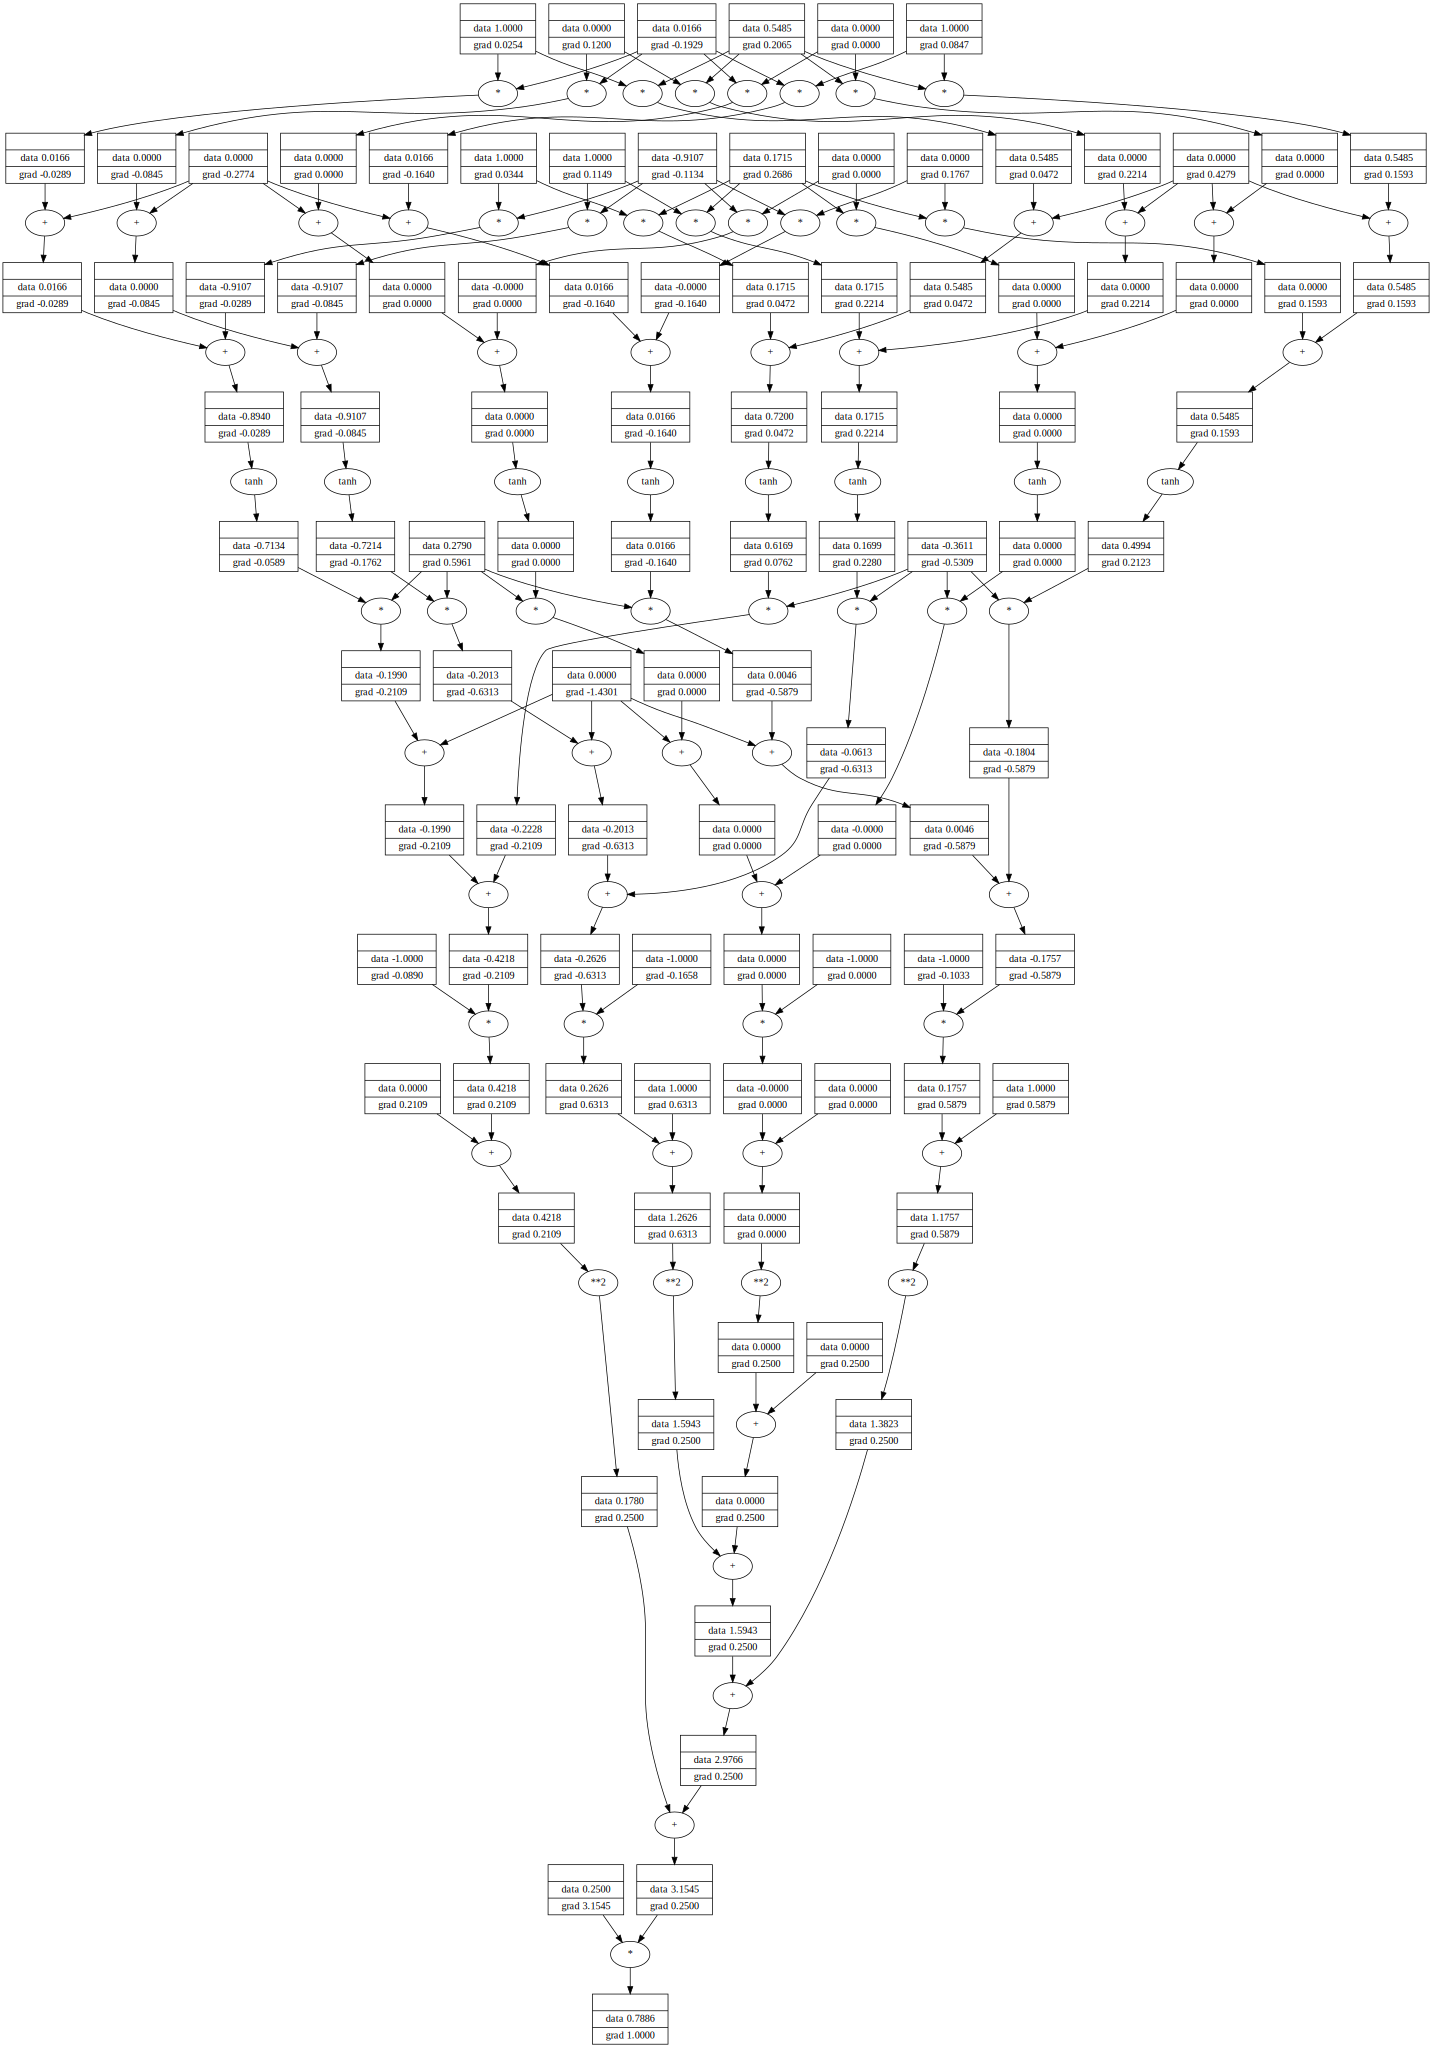


Predicciones del modelo entrenado:
Entrada [0, 0] -> salida cruda = 0.0000 | salida binaria = 0 | esperado = 0
Entrada [0, 1] -> salida cruda = 1.0000 | salida binaria = 1 | esperado = 1
Entrada [1, 0] -> salida cruda = 1.0000 | salida binaria = 1 | esperado = 1
Entrada [1, 1] -> salida cruda = 0.0000 | salida binaria = 0 | esperado = 0


In [41]:
from michigrad.visualize import show_graph

params = model.parameters()
lr = 0.1   # learning rate

EPOCAS = 10000
lista_loss = list()

# Entrenamiento
for epoch in range(EPOCAS):

    # Reseteo loss
    loss = Value(0)

    # Forward: Cálculo de L con suma de errores cuadrados
    for x, y in dataset:
        yhat = model(x)
        loss = loss + (y - yhat)**2
        
    loss *= 0.25
    
    lista_loss.append(loss.data)
    # Pongo todos los gradientes en cero
    model.zero_grad()

    # Backpropagation
    loss.backward()

    if epoch == 0:
      print("Grafo después del backward:")
      dot = show_graph(loss, rankdir="TB", format="png")
      # para que me lo imprima Jupyter a pesar de no ser la última línea
      display(dot)

    # Descenso del gradiente (actualiza parámetros) 
    for p in params:
        p.data -= lr * p.grad


# Predicciones finales sobre la tabla XOR
print("\nPredicciones del modelo entrenado:")
for x, y in dataset:
    yhat = model(x)
    salida = 1 if yhat.data > 0.5 else 0
    print(f"Entrada { [v.data for v in x] } -> salida cruda = {yhat.data:.4f} | salida binaria = {salida} | esperado = {y.data}")

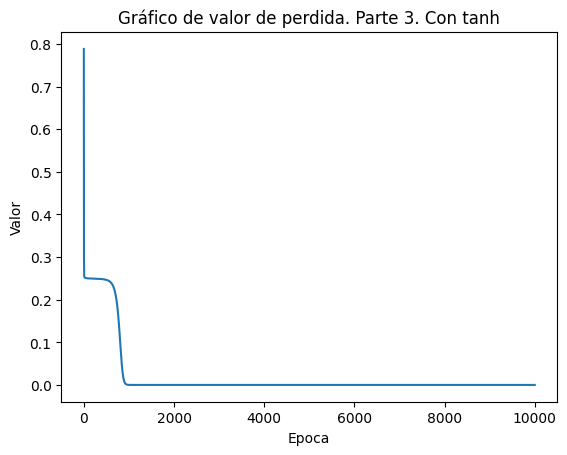

In [42]:
import matplotlib.pyplot as plt

# Crear gráfico de líneas
plt.plot(lista_loss)

# Personalizar el gráfico (opcional)
plt.title('Gráfico de valor de perdida. Parte 3. Con tanh')
plt.xlabel('Epoca')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

### Interpretación de los resultados del modelo entrenado

A diferencia del caso anterior, donde trabajabamos con una neuronas lineales, acá utilizamos un MLP con arquitectura 2–2–1: dos neuronas en una capa oculta con activación "Sigmoide" y una neurona de salida lineal. 
El XOR es un problema de clasificación no linealmente separable, por lo que un modelo de regresión lineal no puede resolverlo. La capa oculta introduce una transformación no lineal del espacio de entrada; cada neurona ahora realizaría predicciones que se van acercando más a 0 o a 1 según la naturaleza del mismo. Luego, la neurona de salida combina esas activaciones para aproximar la tabla de verdad del XOR. Después del entrenamiento, el modelo devuelve valores cercanos a 0 y 1 en los cuatro patrones y, aplicando un umbral sencillo, logra clasificar correctamente todos los casos.